In [64]:
import requests
#import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import pandas as pd
from matplotlib import style
import sklearn

In [65]:
ticker = 'BBIG'
api_key = "ec2d6f3b0cc9395fbce02f1316669229"
years = 10


url = (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?limit={years}&apikey={api_key}")

r = requests.get(url)
balance_sheet = r.json()
print(balance_sheet)

[{'date': '2021-12-31', 'symbol': 'BBIG', 'reportedCurrency': 'USD', 'cik': '0001717556', 'fillingDate': '2022-04-15', 'acceptedDate': '2022-04-15 16:52:59', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 87612176, 'shortTermInvestments': 178000, 'cashAndShortTermInvestments': 87790176, 'netReceivables': 21072224, 'inventory': 475666, 'otherCurrentAssets': 110403401, 'totalCurrentAssets': 219741467, 'propertyPlantEquipmentNet': 1545665, 'goodwill': 121580144, 'intangibleAssets': 40525453, 'goodwillAndIntangibleAssets': 162105597, 'longTermInvestments': 1000000, 'taxAssets': 0, 'otherNonCurrentAssets': 20750000, 'totalNonCurrentAssets': 185401262, 'otherAssets': 0, 'totalAssets': 405142729, 'accountPayables': 6105963, 'shortTermDebt': 44467275, 'taxPayables': 108724, 'deferredRevenue': 7061327, 'otherCurrentLiabilities': 12454981, 'totalCurrentLiabilities': 70089546, 'longTermDebt': 2691551, 'deferredRevenueNonCurrent': 0, 'deferredTaxLiabilitiesNonCurrent': 108420, '

In [66]:
df_balance_sheet = pd.DataFrame(balance_sheet)
print(df_balance_sheet)

         date symbol reportedCurrency         cik fillingDate  \
0  2021-12-31   BBIG              USD  0001717556  2022-04-15   
1  2020-12-31   BBIG              USD  0001717556  2021-04-15   
2  2019-12-31   BBIG              USD  0001717556  2020-05-29   
3  2018-12-31   BBIG              USD  0001717556  2019-04-16   
4  2017-12-31   BBIG              USD  0001717556  2018-04-24   

          acceptedDate calendarYear period  cashAndCashEquivalents  \
0  2022-04-15 16:52:59         2021     FY                87612176   
1  2021-04-15 16:23:51         2020     FY                  249356   
2  2020-05-29 17:23:29         2019     FY                  412719   
3  2019-04-16 17:25:26         2018     FY                 2052731   
4  2018-04-23 20:54:31         2017     FY                  557268   

   shortTermInvestments  ...  totalStockholdersEquity  totalEquity  \
0                178000  ...                113424913    113424913   
1               1018000  ...                 154

In [67]:
df_balance_sheet.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2021-12-31,BBIG,USD,0001717556,2022-04-15,2022-04-15 16:52:59,2021,FY,87612176,178000,...,113424913,113424913,405142729,20262129,405142729,1178000,47158826,-40453350,https://www.sec.gov/Archives/edgar/data/171755...,https://www.sec.gov/Archives/edgar/data/171755...
1,2020-12-31,BBIG,USD,0001717556,2021-04-15,2021-04-15 16:23:51,2020,FY,249356,1018000,...,15416598,15416598,28028207,-1893897,28028207,1018000,8085968,7836612,https://www.sec.gov/Archives/edgar/data/171755...,https://www.sec.gov/Archives/edgar/data/171755...
2,2019-12-31,BBIG,USD,0001717556,2020-05-29,2020-05-29 17:23:29,2019,FY,412719,0,...,7772130,7772130,23609619,-317698,23609619,0,6963105,6550386,https://www.sec.gov/Archives/edgar/data/171755...,https://www.sec.gov/Archives/edgar/data/171755...
3,2018-12-31,BBIG,USD,0001717556,2019-04-16,2019-04-16 17:25:26,2018,FY,2052731,0,...,14988063,14988063,28888588,951576,28888588,0,5327749,3275018,https://www.sec.gov/Archives/edgar/data/171755...,https://www.sec.gov/Archives/edgar/data/171755...
4,2017-12-31,BBIG,USD,0001717556,2018-04-24,2018-04-23 20:54:31,2017,FY,557268,0,...,-232630,-232630,4070827,0,4070827,0,2996500,2439232,https://www.sec.gov/Archives/edgar/data/171755...,https://www.sec.gov/Archives/edgar/data/171755...


In [68]:
df_balance_sheet.describe()

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,1.817685e+07,2.392000e+05,1.841605e+07,5.818558e+06,9.392242e+05,2.221116e+07,4.772168e+07,1.267867e+06,2.853853e+07,1.606992e+07,...,-3.816096e+06,1.910070e+08,3.027381e+07,3.027381e+07,9.794799e+07,3.800422e+06,9.794799e+07,4.392000e+05,1.410643e+07,-4.070420e+06
std,3.882223e+07,4.421326e+05,3.878679e+07,8.531724e+06,6.018132e+05,4.930164e+07,9.616667e+07,3.193397e+05,5.212767e+07,1.489996e+07,...,5.225834e+06,3.685989e+08,4.691872e+07,4.691872e+07,1.720216e+08,9.259200e+06,1.720216e+08,6.040540e+05,1.857572e+07,2.046111e+07
min,2.493560e+05,0.000000e+00,4.127190e+05,1.603127e+06,2.400610e+05,8.046000e+03,3.103923e+06,9.669040e+05,0.000000e+00,0.000000e+00,...,-9.635078e+06,9.445400e+06,-2.326300e+05,-2.326300e+05,4.070827e+06,-1.893897e+06,4.070827e+06,0.000000e+00,2.996500e+06,-4.045335e+07
25%,4.127190e+05,0.000000e+00,5.572680e+05,1.877351e+06,4.756660e+05,1.057100e+04,4.955365e+06,9.988630e+05,5.392123e+06,1.159806e+07,...,-9.445400e+06,2.625958e+07,7.772130e+06,7.772130e+06,2.360962e+07,-3.176980e+05,2.360962e+07,0.000000e+00,5.327749e+06,2.439232e+06
50%,5.572680e+05,0.000000e+00,1.267356e+06,2.265133e+06,9.237070e+05,2.209000e+04,5.342183e+06,1.163835e+06,5.983852e+06,1.268773e+07,...,0.000000e+00,3.018324e+07,1.498806e+07,1.498806e+07,2.802821e+07,0.000000e+00,2.802821e+07,0.000000e+00,6.963105e+06,3.275018e+06
75%,2.052731e+06,1.780000e+05,2.052731e+06,2.274954e+06,1.369225e+06,6.116950e+05,5.465484e+06,1.545665e+06,9.736510e+06,1.553834e+07,...,0.000000e+00,3.905026e+07,1.541660e+07,1.541660e+07,2.888859e+07,9.515760e+05,2.888859e+07,1.018000e+06,8.085968e+06,6.550386e+06
max,8.761218e+07,1.018000e+06,8.779018e+07,2.107222e+07,1.687462e+06,1.104034e+08,2.197415e+08,1.664068e+06,1.215801e+08,4.052545e+07,...,0.000000e+00,8.500966e+08,1.134249e+08,1.134249e+08,4.051427e+08,2.026213e+07,4.051427e+08,1.178000e+06,4.715883e+07,7.836612e+06


## Debt ratio
Debt Ratios
- Amount of debt a company has in relation to it's assets
- The Debt to Ratio tells us the degree of leverage used by the company


         date  totalAssets
0  2021-12-31    405142729
1  2020-12-31     28028207
2  2019-12-31     23609619
3  2018-12-31     28888588
4  2017-12-31      4070827


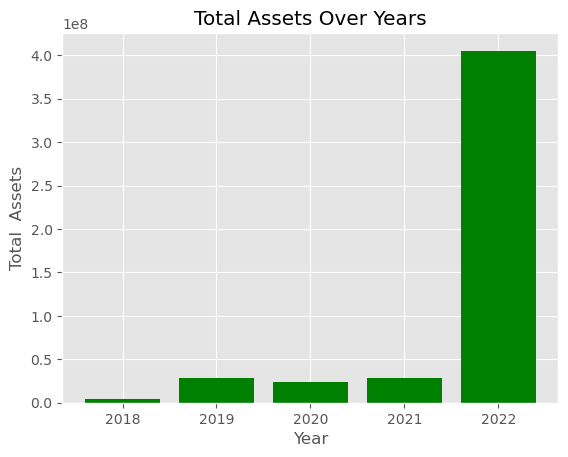

In [69]:
ta_2018 = df_balance_sheet['totalAssets'][4]
ta_2019 = df_balance_sheet['totalAssets'][3]
ta_2020 = df_balance_sheet['totalAssets'][2]
ta_2021 = df_balance_sheet['totalAssets'][1]
ta_2022 = df_balance_sheet['totalAssets'][0]

print(df_balance_sheet[['date','totalAssets']])

ta = [ta_2018, ta_2019, ta_2020, ta_2021, ta_2022]
years = [2018, 2019, 2020, 2021, 2022]

style.use('ggplot')
plt.bar(years, ta, color='green')
plt.xlabel('Year')
plt.ylabel('Total  Assets')
plt.title('Total Assets Over Years')
plt.xticks(years)

plt.show()

         date  totalLiabilities
0  2021-12-31         271455687
1  2020-12-31          14505506
2  2019-12-31          16155187
3  2018-12-31          12948949
4  2017-12-31           4303457


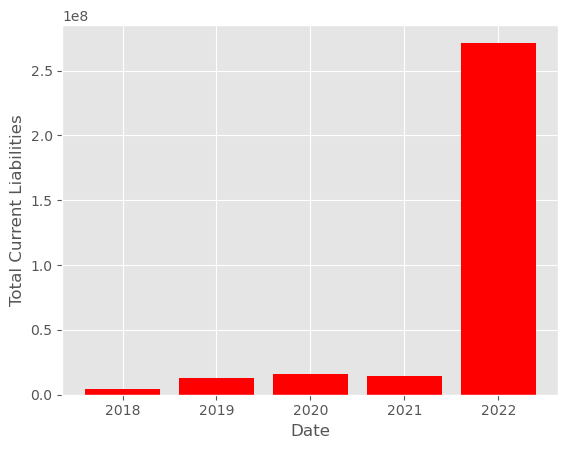

In [70]:
td_2018 = df_balance_sheet['totalLiabilities'][4]
td_2019 = df_balance_sheet['totalLiabilities'][3]
td_2020 = df_balance_sheet['totalLiabilities'][2]
td_2021 = df_balance_sheet['totalLiabilities'][1]
td_2022 = df_balance_sheet['totalLiabilities'][0]

print(df_balance_sheet[['date', 'totalLiabilities']])

TD = [td_2018, td_2019, td_2020, td_2021, td_2022]


style.use('ggplot')
plt.bar(years, TD, color = 'red')
plt.xlabel('Date')
plt.ylabel('Total Current Liabilities')
plt.xticks(years)

plt.show()

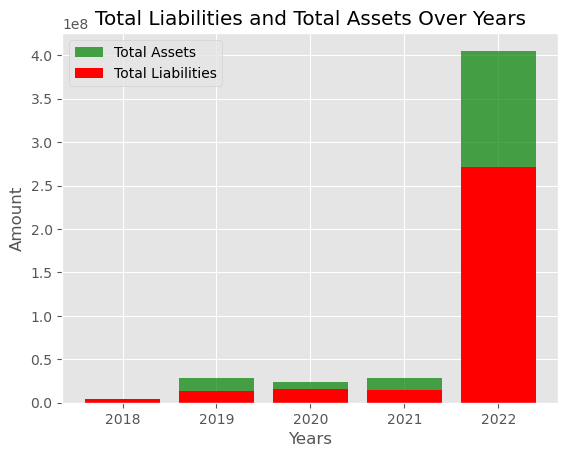

In [71]:
style.use('ggplot')
plt.bar(years, ta, label='Total Assets', alpha=0.7, color='green')
plt.bar(years, TD, label='Total Liabilities', color='red')

plt.xlabel('Years')
plt.ylabel('Amount')
plt.title('Total Liabilities and Total Assets Over Years')
plt.legend()


plt.xticks(years)


plt.show()

Debt to Assets ratio 2018: 1.06
Debt to Assets ratio 2019: 0.45
Debt to Assets ratio 2020: 0.68
Debt to Assets ratio 2021: 0.52
Debt to Assets ratio 2022: 0.67


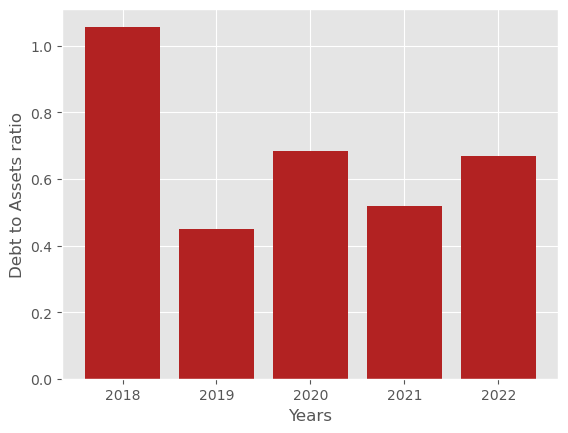

TypeError: '>' not supported between instances of 'list' and 'float'

In [72]:
dar_2018 = td_2018/ta_2018
dar_2019 = td_2019/ta_2019
dar_2020 = td_2020/ta_2020
dar_2021 = td_2021/ta_2021
dar_2022 = td_2022/ta_2022


print(f'Debt to Assets ratio 2018: {round(dar_2018,2)}')
print(f'Debt to Assets ratio 2019: {round(dar_2019,2)}')
print(f'Debt to Assets ratio 2020: {round(dar_2020,2)}')
print(f'Debt to Assets ratio 2021: {round(dar_2021,2)}')
print(f'Debt to Assets ratio 2022: {round(dar_2022,2)}')

dar = [dar_2018, dar_2019, dar_2020, dar_2021, dar_2022]

style.use('ggplot')
plt.bar(years, dar, color='firebrick' )
plt.xlabel('Years')
plt.ylabel('Debt to Assets ratio')
plt.show()

if dar > 0.35:
    print(f'Healthy Ratio {dar_2022}')
else:
    print(f'Warning {dar_2022}')


In [ ]:
"""stock = ticker
closing_price = yf.Ticker(ticker).history(period = '1d')['Close'].iloc[-1]

print(f'Closing Price: {closing_price}')"""

## Debt to Equity ratio
- Amount of debt a company has in relation to its equity
- The Lower the ratio, the less the debt compared to equity

In [ ]:
dte_2018 = df_balance_sheet['totalLiabilities'][4]/df_balance_sheet['totalStockholdersEquity'][4]
dte_2019 = df_balance_sheet['totalLiabilities'][3]/df_balance_sheet['totalStockholdersEquity'][3]
dte_2020 = df_balance_sheet['totalLiabilities'][2]/df_balance_sheet['totalStockholdersEquity'][2]
dte_2021 = df_balance_sheet['totalLiabilities'][1]/df_balance_sheet['totalStockholdersEquity'][1]
dte_2022 = df_balance_sheet['totalLiabilities'][0]/df_balance_sheet['totalStockholdersEquity'][0]

print(f'Debt to Equity ratio 2018: {round(dte_2018, 2)}')
print(f'Debt to Equity ratio 2019: {round(dte_2019, 2)}')
print(f'Debt to Equity ratio 2020: {round(dte_2020, 2)}')
print(f'Debt to Equity ratio 2021: {round(dte_2021, 2)}')
print(f'Debt to Equity ratio 2022: {round(dte_2022, 2)}')

dte = [dte_2018, dte_2019, dte_2020, dte_2021, dte_2022]

style.use('ggplot')
plt.bar(years, dte, color="darkblue" )
plt.xlabel('Debt to Equity ratio')
plt.ylabel('Years')

## Equity Multiplier
- Measures the proportion of a company's assets that ate financed trough debt versus equity
- A high equity multiplier mean that the company is relying more on debt to finance its assets rather than equity

In [ ]:
em_2018 = df_balance_sheet['totalAssets'][4]/df_balance_sheet['totalEquity'][4]
em_2019 = df_balance_sheet['totalAssets'][3]/df_balance_sheet['totalEquity'][3]
em_2020 = df_balance_sheet['totalAssets'][2]/df_balance_sheet['totalEquity'][2]
em_2021 = df_balance_sheet['totalAssets'][1]/df_balance_sheet['totalEquity'][1]
em_2022 = df_balance_sheet['totalAssets'][0]/df_balance_sheet['totalEquity'][0]



## Current Ratio
- Measures whether a company has enough short-term assets to cover its short-term liabilities
- The higher the ratio, the more assets you have in relation to your liabilities

## Current Ratio
Liquidity Measurements Ratios
- A Current ratio of 1.0 or greater ia an indication that the company is well positioned to cover its current or short term liabilities